# 3.6 Lab: Linear Regression

In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

**3.6.1 Libraries**

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model

**3.6.2 Simple Linear Regression**

以下代码对应原书中的：

> fix(Boston)

> names(Boston)

In [3]:
Boston = pd.read_csv("data/Boston.csv")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
#对应原书提到?Boston，pandas使用describe
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


以下代码对应
> lm.fit=lm(medv∼lstat ,data=Boston)

> attach(Boston)

> lm.fit=lm(medv∼lstat)

In [5]:
#statsmodels方案
X_lstat = Boston['lstat']
y_medv = Boston['medv']
X_lstat_model = sm.add_constant(X_lstat)
results = sm.OLS(y_medv, X_lstat_model).fit()

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
#更贴近原书代码的statsmodels的smf方案（即statsmodels的公式API（smf）和Patsy的公式字符串，更简洁）
results_smf = smf.ols('medv ~ lstat',data = Boston).fit()

In [7]:
#sklearn方案
lin_Boston = linear_model.LinearRegression()
lin_Boston.fit(np.c_[X_lstat],np.c_[y_medv])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**以下代码对应**
> lm.fit

> summary(lm.fit)

> names(lm.fit)

> coef (l m.fit)

> confint(lm.fit)

In [8]:
#statsmodels方案(使用summary可将原书几个代码实现的大部分统计数据一次取出，这是statsmodels用于数据统计的强大之处)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           5.08e-88
Time:                        16:44:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
results_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           5.08e-88
Time:                        16:44:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#> summary(lm.fit)中的Residuals
results.resid.describe().round(2)

count    506.00
mean       0.00
std        6.21
min      -15.17
25%       -3.99
50%       -1.32
75%        2.03
max       24.50
dtype: float64

In [11]:
results_smf.resid.describe().round(2)

count    506.00
mean       0.00
std        6.21
min      -15.17
25%       -3.99
50%       -1.32
75%        2.03
max       24.50
dtype: float64

In [12]:
#sklearn方案获取部分统计数据（相较statsmodels可直接获取的统计较少,部分需要按照公式程序推导，部分推导可参考章节的PYTHON实现过程）
from scipy import stats
from sklearn import metrics
y_medv_predictions = lin_Boston.predict(np.c_[X_lstat])
lin_rse = ((np.c_[y_medv_predictions] - np.c_[y_medv])**2).sum()/(len(y_medv)-2)
Intercept_Std_Error = (lin_rse*(1/len(y_medv)+X_lstat.mean()**2/((X_lstat-X_lstat.mean())**2).sum()))**0.5
coef_Std_Error = (lin_rse/((X_lstat-X_lstat.mean())**2).sum())**0.5
Intercept_t_value = lin_Boston.intercept_[0]/Intercept_Std_Error
coef_t_value = lin_Boston.coef_[0][0]/coef_Std_Error
df = len(y_medv)-2
Intercept_statistic = (1 - stats.t.cdf(abs(Intercept_t_value),df))*2
coef_statistic = (1 - stats.t.cdf(abs(coef_t_value),df))*2
Multiple_R_squared = metrics.r2_score(np.c_[y_medv], np.c_[y_medv_predictions])
Adjusted_R_squared = 1 - (1-Multiple_R_squared ) * (len(y_medv)-1)/(len(y_medv)-2)
F_statistic = coef_t_value ** 2
#打印结果
print('Intercept:' ,lin_Boston.intercept_[0].round(4))
print('coef-lstat:' ,lin_Boston.coef_[0][0].round(4))
print('Intercept Std. Error:' , Intercept_Std_Error.round(4))
print('coef-lstat Std. Error:' , coef_Std_Error.round(4))
print('Intercept t value:' , Intercept_t_value.round(1))
print('coef-lstat t value:' , coef_t_value.round(1))
print('Intercept Pr >|t|:' , Intercept_statistic)
print('coef-lstat Pr >|t|:' , coef_statistic)
print('Residual standard error: {0:.2f} on {1} degrees of freedom'.format(lin_rse**0.5 , df)) 
print('Multiple R-squared:',Multiple_R_squared.round(3))
print('Adjusted R-squared:',Adjusted_R_squared.round(3))
print('F-statistic :',F_statistic.round())

Intercept: 34.5538
coef-lstat: -0.95
Intercept Std. Error: 0.5626
coef-lstat Std. Error: 0.0387
Intercept t value: 61.4
coef-lstat t value: -24.5
Intercept Pr >|t|: 0.0
coef-lstat Pr >|t|: 0.0
Residual standard error: 6.22 on 504 degrees of freedom
Multiple R-squared: 0.544
Adjusted R-squared: 0.543
F-statistic : 602.0


In [13]:
#sklearn方案获取Residuals统计
pd.DataFrame(np.c_[y_medv] - np.c_[y_medv_predictions],columns = ['Residuals']).describe().round(2)

,Residuals
count,506.00
mean,-0.00
std,6.21
min,-15.17
25%,-3.99
50%,-1.32
75%,2.03
max,24.50


**以下代码对应原书中confint(lm.fit)** （names(lm.fit)可使用python的tab方法/coef(lm.fit)前面已有）

In [14]:
#statsmodels方案详见之前的summary，sklearn方案续利用t分布95%系数计算
t_ratio = stats.t.interval(0.95, df = df)[1]
print('Intercept [0.025 - 0.975]:' + str((lin_Boston.intercept_[0] - t_ratio* Intercept_Std_Error).round(3))
      + '-->' + str((lin_Boston.intercept_[0] + t_ratio* Intercept_Std_Error).round(3)))
print('coef-lstat [0.025 - 0.975]:' + str((lin_Boston.coef_[0][0] - t_ratio* coef_Std_Error).round(3))
      + '-->' + str((lin_Boston.coef_[0][0] + t_ratio* coef_Std_Error).round(3)))

Intercept [0.025 - 0.975]:33.448-->35.659
coef-lstat [0.025 - 0.975]:-1.026-->-0.874


**以下代码对应**

> predict(lm.fit,data.frame(lstat=c(5,10,15)),interval ="confidence ")

> predict(lm.fit,data.frame(lstat=c(5,10,15)),interval ="prediction ")

In [15]:
#使用statsmodels中的OLSResults.get_prediction实现
X_lstat_test =np.c_[[1,1,1],[5,10,15]]
predict_test = sm.regression.linear_model.OLSResults.get_prediction(results,exog=X_lstat_test)
sm.regression.linear_model.PredictionResults.summary_frame(predict_test)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


**以下代码对应原书中**

> plot(lstat ,medv)

> abline(lm.fit)

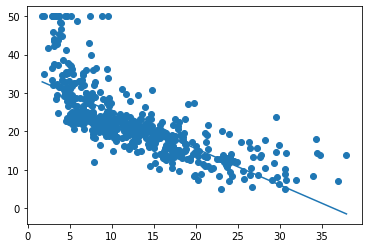

In [16]:
plt.scatter(X_lstat, y_medv)
X_draw = np.linspace(X_lstat.min(), X_lstat.max(), 50)
plt.plot(X_draw, lin_Boston.intercept_[0] + lin_Boston.coef_[0][0]*X_draw)
plt.show()

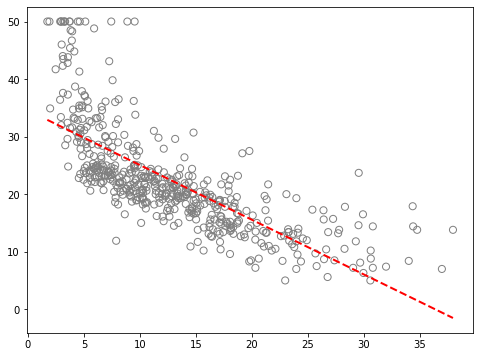

In [17]:
#类似原书R代码的pch等选项进行美化
plt.figure(figsize=(8, 6))
plt.scatter(X_lstat, y_medv, color='', marker='o', edgecolors='gray', s=50)
X_draw = np.linspace(X_lstat.min(), X_lstat.max(), 50)
plt.plot(X_draw, lin_Boston.intercept_[0] + lin_Boston.coef_[0][0]*X_draw,'red',linewidth= 2,linestyle='--')
plt.show()

**以下演示关于PYTHON实现残差图、各种散点图、获取杠杆统计量，学生化残差的一些手段**

In [18]:
from statsmodels.stats.outliers_influence import OLSInfluence
results_Influence = OLSInfluence(results)
#通过summary_frame查看变量相关的一些统计特征，可以用dir(results_Influence)查看所有属性和方法
results_Influence.summary_frame().iloc[374]

dfb_const         -0.294291
dfb_lstat          0.401657
cooks_d            0.086162
standard_resid     2.498416
hat_diag           0.026865
dffits_internal    0.415119
student_resid      2.511537
dffits             0.417300
Name: 374, dtype: float64

对应（类似）原文中的：
> par(mfrow=c(2,2))

> plot(predict(lm.fit), residuals (lm.fit))

> plot(predict(lm.fit), rstudent (lm.fit))

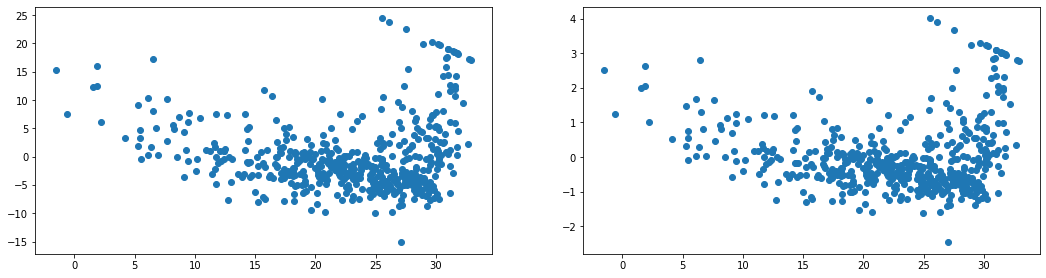

In [19]:
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.scatter(results.predict(),results.resid)
plt.subplot(222)
plt.scatter(results.predict(),results_Influence.resid_studentized_external)
plt.show()

对应（类似）原文中的：
>  plot(hatvalues (lm.fit))

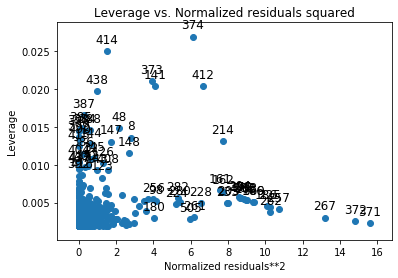

In [20]:
#statsmodels绘制杠杆等级，横轴为方差（代表离散情况），竖轴为杠杆等级（374相当于原书的375）
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(results)
plt.show()

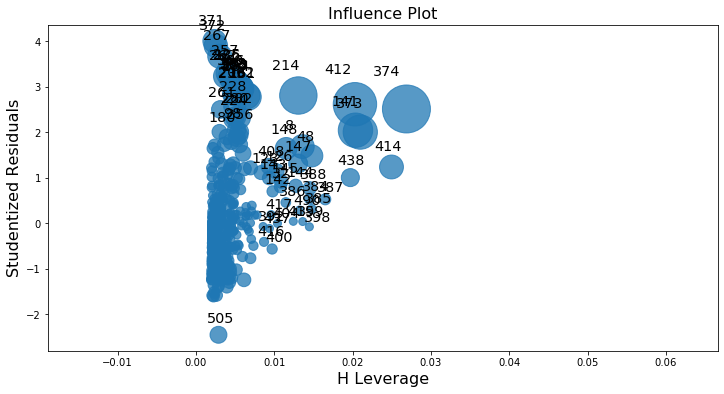

In [21]:
#statsmodels绘制杠杆等级方式2，横轴为杠杆等级，竖轴为学生化残差（代表离散情况）（374相当于原书的375）
fig, ax = plt.subplots(figsize=(12,6))
fig = sm.graphics.influence_plot(results, ax=ax)
plt.show()

对应（类似）原文中的：
>  which.max(hatvalues (lm.fit))

In [22]:
hatvalues = results_Influence.hat_diag_factor
np.argmax(hatvalues)

374

**sklearn的残差图函数编写，实现一些观察功能**

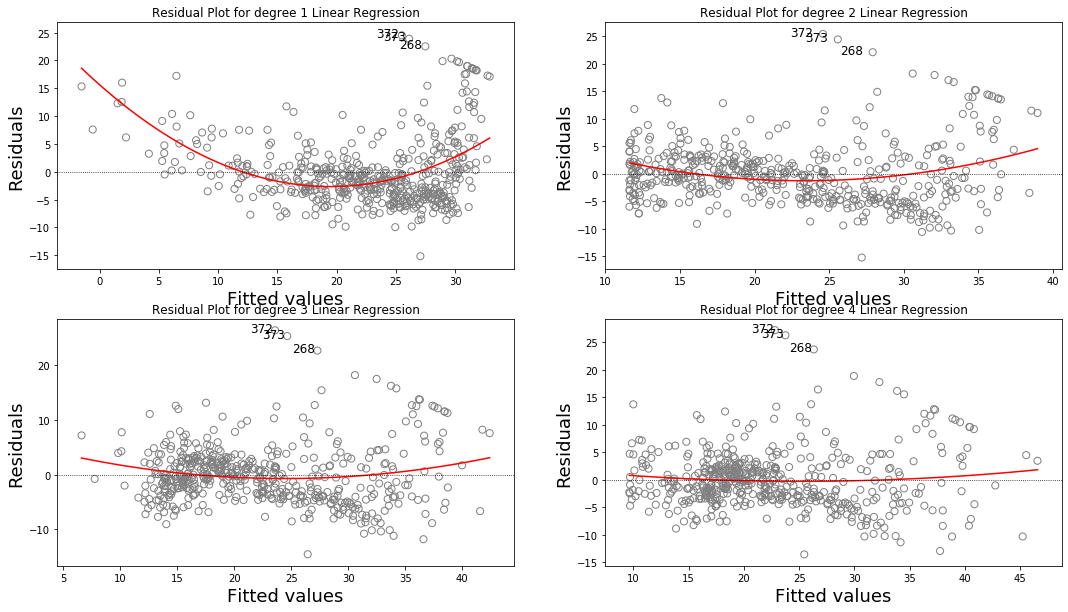

In [23]:
#sklearn的残差图函数编写，实现了原文中的几个函数（为什么不用statsmodels实现，个人觉得PolynomialFeatures拟合高次项方便）
from sklearn.preprocessing import PolynomialFeatures
def plot_Residuals(X_in , y_in,degree_in = 1,degree_Residuals = 2,tap_show = False):    
    poly_features_in = PolynomialFeatures(degree = degree_in,include_bias=False)
    X_degree_in = poly_features_in.fit_transform(np.c_[X_in])
    lin_in = linear_model.LinearRegression()
    lin_in.fit(X_degree_in,y_in)
    y_predict = pd.Series(lin_in.predict(X_degree_in ),index = y_in.index)
    y_Residuals = y_in - y_predict
    poly_features_Residuals = PolynomialFeatures(degree = degree_Residuals,include_bias=False)
    y_predict_poly = poly_features_Residuals.fit_transform(np.c_[y_predict])
    lin_Residuals = linear_model.LinearRegression()
    lin_Residuals.fit(np.c_[y_predict_poly],np.c_[y_Residuals])
    X_new = np.linspace(y_predict.min(), y_predict.max(), 100).reshape(100, 1)
    X_new_poly = poly_features_Residuals.fit_transform(X_new)
    y_new_predict = lin_Residuals.predict(X_new_poly)
    plt.plot(X_new,y_new_predict, "red")
    plt.scatter(y_predict,y_Residuals,color='', marker='o', edgecolors='gray', s=50)
    plt.xlabel("Fitted values", fontsize=18)
    plt.ylabel("Residuals", fontsize=18)
    plt.axhline(y=0,linewidth= 0.8,color = 'black',linestyle=':' )
    if tap_show == True:
        tap_1,tap_2,tap_3 = np.abs(y_Residuals).sort_values(ascending=False).index[:3]
        plt.text(y_predict[tap_1] -2.2, y_Residuals[tap_1] - 0.3, str(tap_1 + 1), fontsize=12, color="black")
        plt.text(y_predict[tap_2] -2.2, y_Residuals[tap_2] - 0.3, str(tap_2 + 1), fontsize=12, color="black")
        plt.text(y_predict[tap_3] -2.2 , y_Residuals[tap_3] - 0.3, str(tap_3 + 1), fontsize=12, color="black") 

#绘图,可以看出高次拟合后，残差图改善，但原书中 which.max(hatvalues (lm.fit))为杠杆点375，图形显现372为离群点
plt.figure(figsize=(18,10))
for i in range(1,5):
    pic_num = '22' + str(i)
    plt.subplot(pic_num)
    plot_Residuals(X_lstat , y_medv,degree_in = i, tap_show = True)
    plt.title('Residual Plot for degree {} Linear Regression'.format(i))
plt.show()

**3.6.3 Multiple Linear Regression**

**以下代码对应原文中：**
> lm.fit=lm(medv∼lstat+age ,data=Boston)

> summary(lm.fit)

In [24]:
#statsmodels实现（从现在开始全部使用更简洁smf表达）
results_lstat_age = smf.ols('medv ~ lstat + age ',data = Boston).fit()
results_lstat_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.98e-88
Time:                        16:44:40   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
results_lstat_age.resid.describe().round(2)

count    506.00
mean      -0.00
std        6.16
min      -15.98
25%       -3.98
50%       -1.28
75%        1.97
max       23.16
dtype: float64

In [26]:
#从前面的例子看skleran实现所有统计过于复杂，这里只演示Coefficients实现
X_lstat_age = Boston[['lstat','age']]
lin_Boston_lstat_age = linear_model.LinearRegression()
lin_Boston_lstat_age.fit(np.c_[X_lstat_age],np.c_[y_medv])
print('Intercept:' ,lin_Boston_lstat_age.intercept_.round(4))
print('coef-lstat:' ,lin_Boston_lstat_age.coef_.round(4))

Intercept: [33.2228]
coef-lstat: [[-1.0321  0.0345]]


**以下代码对应原文中：**
> lm.fit=lm(medv∼ ,data=Boston)

> summary(lm.fit)

In [27]:
#statsmodels实现（从现在开始全部使用更简洁smf表达）
columns_value = '1'
for column_value in Boston.columns:
    columns_value = columns_value + '+' + column_value
results_medv_all = smf.ols('medv ~ {} - medv '.format(columns_value),data = Boston).fit()
results_medv_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          6.72e-135
Time:                        16:44:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
results_medv_all.resid.describe().round(2)

count    506.00
mean       0.00
std        4.68
min      -15.59
25%       -2.73
50%       -0.52
75%        1.78
max       26.20
dtype: float64

**以下对应原文中的：**

> library(car)

> vif (l m.fit)

In [29]:
#直接利用statsmodels的variance_inflation_factor实现
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 注意不要遗漏，这里[1]*n是[1] 变成n个1的列表，而不是[1*n]
X_medv_all_stats = Boston.drop('medv',axis = 1).join(pd.DataFrame([1] * Boston.shape[0],columns = ['intercept']))
X_medv_all_stats_m = np.c_[X_medv_all_stats]
[variance_inflation_factor(X_medv_all_stats_m, i) for i in range(X_medv_all_stats_m.shape[1])]

[1.7921915474332413,
 2.2987581787494418,
 3.9915964183460315,
 1.0739953275537886,
 4.393719847577493,
 1.9337444357832554,
 3.1008255128153372,
 3.955944906372728,
 7.484496335274472,
 9.00855394759707,
 1.7990840492488984,
 1.3485210764063749,
 2.9414910780919348,
 585.2652379423121]

In [30]:
vif = pd.DataFrame()
vif["features"] = X_medv_all_stats.columns
vif["VIF Factor"] = [variance_inflation_factor(X_medv_all_stats_m, i) for i in range(X_medv_all_stats_m.shape[1])]
vif.set_index('features').T.round(2)

features,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,intercept
VIF Factor,1.79,2.3,3.99,1.07,4.39,1.93,3.1,3.96,7.48,9.01,1.8,1.35,2.94,585.27


In [31]:
#利用sklearn获取的VIF函数编写
from sklearn.metrics import r2_score
def vif_sk(X_pd_frame):
    vif_list = []
    vif_sk = pd.DataFrame()
    for i in range(X_pd_frame.shape[1]):
        lin_vif_sk = linear_model.LinearRegression()
        X_vif_sk = X_pd_frame.drop(X_pd_frame.columns[i],axis=1)
        y_vif_sk = X_pd_frame.iloc[:,i]
        lin_vif_sk.fit(np.c_[X_vif_sk], np.c_[y_vif_sk])
        y_vif_sk_predict = lin_vif_sk.predict(np.c_[X_vif_sk])
        vif_list.append(1/(1-r2_score(np.c_[y_vif_sk], np.c_[y_vif_sk_predict])))
    vif_sk["VIF Factor"] = vif_list
    vif_sk["features"] = X_pd_frame.columns    
    return vif_sk.set_index('features').T
vif_sk(Boston.drop('medv',axis = 1)).round(2)

features,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
VIF Factor,1.79,2.3,3.99,1.07,4.39,1.93,3.1,3.96,7.48,9.01,1.8,1.35,2.94


**以下对应原文中的：**

> lm.fit1=lm(medv∼.-age ,data=Boston)

> summary(lm.fit1)

In [32]:
#statsmodels实现
results_medv_showdorp = smf.ols('medv ~ {} - medv - age '.format(columns_value),data = Boston).fit()
results_medv_showdorp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          6.08e-136
Time:                        16:44:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
zn             0.0463      0.014      3.404      0.001       0.020       0.073
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
chas           2.6890      0.860      3.128      0.002       1.000       4.378
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
rm             3.8144      0.408      9.338      0.000       3.012       4.617
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
rad            0.3058      0.066      4.627      0.000       0.176       0.436
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
black          0.0093      0.003      3.481      0.001       0.004       0.015
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.6.4 Interaction Terms**

**以下代码对应原文中：**
> summary(lm(medv∼lstat*age,data=Boston))

In [33]:
#statsmodels实现
results_lstat_age_each = smf.ols('medv ~ lstat*age ',data = Boston).fit()
results_lstat_age_each.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           4.86e-88
Time:                        16:44:40   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.6.5 Non-linear Transformations of the Predictors**

**以下代码对应原文中：**
> lm.fit2=lm(medv∼lstat+I(lstat^2))

> summary(lm.fit2)

In [34]:
#statsmodels实现
results_lstat_d2 = smf.ols('medv ~ lstat + I(lstat**2 )',data = Boston).fit()
results_lstat_d2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          1.56e-112
Time:                        16:44:40   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**以下代码对应原文中的**
> anova(lm.fit ,lm.fit2)

In [35]:
from statsmodels.stats.anova import anova_lm
anova_lm(results_smf,results_lstat_d2)

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


> plot(lm.fit2)

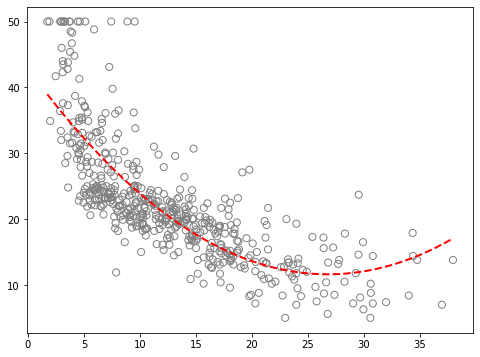

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(X_lstat, y_medv, color='', marker='o', edgecolors='gray', s=50)
X_draw = np.linspace(X_lstat.min(), X_lstat.max(), 50)
plt.plot(X_draw, results_lstat_d2.params['Intercept'] 
         + results_lstat_d2.params['lstat'] * X_draw
         + results_lstat_d2.params['I(lstat ** 2)'] * X_draw ** 2 ,'red',linewidth= 2,linestyle='--')
plt.show()

> lm.fit5=lm(medv∼poly(lstat ,5))

> summary(lm.fit5)

In [37]:
#运行结果与原文不一致(因为R语言中生成的是正交基)
def patsy_model_poly(factor,degree = 2):
    model_poly = factor
    for i in range(2,degree + 1):
        model_poly = model_poly + '+ I(' + factor +  '**{})'.format(str(i))
    return model_poly
results_lstat_d5 = smf.ols('medv ~ {}'.format(patsy_model_poly('lstat',5)),data = Boston).fit()
results_lstat_d5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          8.73e-122
Time:                        16:44:41   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783      0.000      60.618      74.781
lstat           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
I(lstat ** 2)     1.2728      0.223      5.703      0.000       0.834       1.711
I(lstat ** 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
I(lstat ** 4)     0.0017      0.000      4.143      0.000       0.001       0.003
I(lstat ** 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> summary(lm(medv∼log(rm),data=Boston))

In [38]:
smf.ols('medv ~ np.log(rm)',data = Boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           1.22e-64
Time:                        16:44:41   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.6.6 Qualitative Predictors**

**以下代码对应原书中的：**

> fix(Carseats )

> names(Carseats )

In [39]:
Carseats = pd.read_csv("data/Carseats.csv")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

> lm.fit=lm(Sales∼.+Income:Advertising +Price:Age,data=Carseats )

> summary(lm.fit)

In [40]:
#statsmodels实现
columns_value = '1'
for column_value in Carseats.columns:
    columns_value = columns_value + '+' + column_value
results_Carseats_test = smf.ols('Sales ~ {} - Sales + Income:Advertising + Price:Age'.format(columns_value),data = Carseats).fit()
results_Carseats_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          6.14e-166
Time:                        16:44:41   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> attach(Carseats )

> contrasts (ShelveLoc )

In [41]:
import patsy
patsy.dmatrix('ShelveLoc',Carseats).design_info

DesignInfo(['Intercept', 'ShelveLoc[T.Good]', 'ShelveLoc[T.Medium]'],
           factor_infos={EvalFactor('ShelveLoc'): FactorInfo(factor=EvalFactor('ShelveLoc'),
                                    type='categorical',
                                    state=<factor state>,
                                    categories=('Bad', 'Good', 'Medium'))},
           term_codings=OrderedDict([(Term([]),
                                      [SubtermInfo(factors=(),
                                                   contrast_matrices={},
                                                   num_columns=1)]),
                                     (Term([EvalFactor('ShelveLoc')]),
                                      [SubtermInfo(factors=(EvalFactor('ShelveLoc'),),
                                                   contrast_matrices={EvalFactor('ShelveLoc'): ContrastMatrix(array([[0., 0.],
                                                                                            [1., 0.],
       

In [42]:
contrasts_modle = patsy.dmatrix('ShelveLoc',Carseats).design_info
contrasts_term = contrasts_modle.terms[1]
contrasts_EvalFactor = contrasts_term.factors[0]
contrasts_index = contrasts_modle.factor_infos[contrasts_EvalFactor].categories
contrasts_columns = contrasts_modle.term_codings[contrasts_term][0].contrast_matrices[contrasts_EvalFactor].column_suffixes
contrasts_array = contrasts_modle.term_codings[contrasts_term][0].contrast_matrices[contrasts_EvalFactor].matrix
contrasts = pd.DataFrame(contrasts_array,index = contrasts_index,columns = contrasts_columns)
contrasts

,[T.Good],[T.Medium]
Bad,0.0,0.0
Good,1.0,0.0
Medium,0.0,1.0
